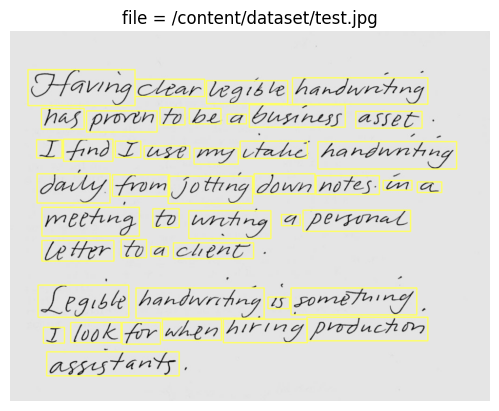

[[37, 80, 260, 155], [260, 100, 405, 136], [409, 103, 578, 151], [588, 97, 870, 152], [65, 161, 154, 204], [159, 166, 306, 210], [312, 159, 364, 195], [373, 161, 439, 193], [452, 173, 492, 193], [498, 153, 698, 200], [720, 167, 858, 202], [55, 226, 108, 264], [111, 225, 214, 271], [219, 229, 272, 263], [279, 239, 374, 266], [383, 244, 475, 277], [479, 229, 619, 265], [641, 230, 930, 287], [56, 297, 208, 358], [213, 299, 332, 344], [329, 302, 505, 359], [508, 297, 635, 339], [637, 301, 769, 340], [777, 311, 837, 331], [848, 314, 899, 336], [66, 367, 269, 427], [297, 370, 352, 409], [372, 374, 543, 432], [565, 382, 604, 405], [610, 373, 834, 417], [66, 436, 216, 479], [231, 434, 284, 472], [293, 449, 329, 469], [340, 441, 507, 474], [58, 529, 247, 596], [262, 535, 529, 598], [537, 554, 582, 578], [585, 535, 847, 591], [69, 617, 113, 650], [126, 607, 231, 649], [233, 607, 313, 652], [317, 601, 440, 644], [444, 600, 619, 649], [618, 596, 870, 645], [76, 668, 352, 718]]


In [1]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from google.colab import files
import matplotlib.pyplot as plt
def image_loder(image_path):


    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    h, w, c = img.shape

    if w > 1000:

        new_w = 1000
        ar = w/h
        new_h = int(new_w/ar)

        img = cv2.resize(img, (new_w, new_h), interpolation = cv2.INTER_AREA)
    return img


def thresholding(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img_gray,80,255,cv2.THRESH_BINARY_INV)
    plt.imshow(thresh, cmap='gray')
    return thresh


pagecount=1

# Path to your folder containing images
folder_path = "/content/dataset"  # Change this to your actual folder path

# Get list of all files in the folder
image_files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

# Process images one by one
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    # print(image_path)
    p=image_loder(image_path)
    # plt.imshow(p);
    thresh_img = thresholding(p);
    kernel = np.ones((3,85), np.uint8)
    dilated = cv2.dilate(thresh_img, kernel, iterations = 1)
    # plt.imshow(dilated, cmap='gray');
    (contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contours_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h)
    img2 = p.copy()

    for ctr in sorted_contours_lines:

        x,y,w,h = cv2.boundingRect(ctr)
        cv2.rectangle(img2, (x,y), (x+w, y+h), (40, 100, 250), 2)

    # plt.imshow(img2);
    #dilation
    kernel = np.ones((3,15), np.uint8)
    dilated2 = cv2.dilate(thresh_img, kernel, iterations = 1)
    plt.imshow(dilated2, cmap='gray');
    #///////
    img3 = p.copy()
    words_list = []

    for line in sorted_contours_lines:

        # roi of each line
        x, y, w, h = cv2.boundingRect(line)
        roi_line = dilated2[y:y+h, x:x+w]

        # draw contours on each word
        (cnt, heirarchy) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        sorted_contour_words = sorted(cnt, key=lambda cntr : cv2.boundingRect(cntr)[0])

        for word in sorted_contour_words:

            if cv2.contourArea(word) < 400:
                continue

            x2, y2, w2, h2 = cv2.boundingRect(word)
            words_list.append([x+x2, y+y2, x+x2+w2, y+y2+h2])
            cv2.rectangle(img3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (255,255,100),2)

    plt.imshow(img3);
    plt.title(f'file = {image_path}')  # Add title for reference
    plt.axis('off')  # Remove axes for clarity
    plt.show()  # Show the image before moving to the next one
    print(words_list)

    base_dir = "finaldataset"
    # Ensure the base directory exists
    os.makedirs(base_dir, exist_ok=True)

    wn = 0  # Word number tracker

    # Create a folder for each writer inside base_dir
    page_folder = os.path.join(base_dir, f"page_{pagecount}")
    os.makedirs(page_folder, exist_ok=True)
    for word_pil in words_list:
            # if wn > 10:  # Limit to 6 words per writer (0 to 5)
            #     break

            ninth_word = words_list[wn]
            actualimg = p[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]

            # Define the path to save the image
            image_path = os.path.join(page_folder, f"word_{wn}.png")

            # Save the image
            cv2.imwrite(image_path, actualimg)
            # print(image_path)
            # Increment the word number
            wn += 1
    pagecount+=1


In [2]:
!zip -r output_file.zip finaldataset


  adding: finaldataset/ (stored 0%)
  adding: finaldataset/page_1/ (stored 0%)
  adding: finaldataset/page_1/word_23.png (deflated 3%)
  adding: finaldataset/page_1/word_29.png (deflated 12%)
  adding: finaldataset/page_1/word_30.png (deflated 11%)
  adding: finaldataset/page_1/word_13.png (deflated 2%)
  adding: finaldataset/page_1/word_1.png (deflated 9%)
  adding: finaldataset/page_1/word_10.png (deflated 9%)
  adding: finaldataset/page_1/word_35.png (deflated 12%)
  adding: finaldataset/page_1/word_31.png (deflated 5%)
  adding: finaldataset/page_1/word_19.png (deflated 9%)
  adding: finaldataset/page_1/word_20.png (deflated 12%)
  adding: finaldataset/page_1/word_17.png (deflated 11%)
  adding: finaldataset/page_1/word_8.png (deflated 0%)
  adding: finaldataset/page_1/word_37.png (deflated 11%)
  adding: finaldataset/page_1/word_44.png (deflated 12%)
  adding: finaldataset/page_1/word_21.png (deflated 10%)
  adding: finaldataset/page_1/word_11.png (deflated 3%)
  adding: finaldata